# how many systems are unbound by SN1 vs SN2 at higher Z? 

also

# What is the core mass of the potential DCO progenitors at different metallicity? 



In [53]:
import numpy as np
import os 
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import colorsys
from matplotlib.gridspec import GridSpec


home_dir = os.path.expanduser("~") 
compas_v = "v03.01.02"# "v02.46.01/"#v02.35.02/"
sim_name =  'NewWinds_RemFryer2012' #'OldWinds_RemFryer2012'#  'NewWinds_RemFryer2012_noNSBHkick'#'OldWinds_RemFryer2012'#  
channel_key     = '_stable' #'', '_stable' # '_CE' '_CHE'  '' 

datar_root = f"{home_dir}/ceph/CompasOutput/{compas_v}"

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,20,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


# Turn off natural name warning for panda tables (this is due to '@' and '>' in the COMPAS column names)
import warnings
from tables import NaturalNameWarning
warnings.filterwarnings('ignore', category=NaturalNameWarning)

######################################
# Helper function to make color darker
def darken_color(color, factor=0.8):
    r, g, b = (int(color[i:i+2], 16)/255 for i in (1, 3, 5))
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return '#%02x%02x%02x' % tuple(int(x*255) for x in colorsys.hls_to_rgb(h, l*factor, s))



In [54]:
####################################
# Take the base potential DCO progenitor table
prog_table_name = f'potential_DCO_progenitors_Allinfo{channel_key}.h5'

if os.path.isfile(datar_root+ f'/{sim_name}/'+prog_table_name):
    potential_DCO_progenitors = pd.read_hdf(f'{datar_root}/{sim_name}/' + prog_table_name, key='All_DCO')
    print('Table exists, reading in... ',  potential_DCO_progenitors.info())
else:
    print(f'error, {datar_root}/{sim_name}/{prog_table_name} does not exist, you should make it using "DataManipulation.ipynb" first')

potential_DCO_progenitors.reset_index(drop=True, inplace=True)
    

### Split your table between merging BBH/BHNS/NSNS

with h5.File(f'{datar_root}/{sim_name}/COMPAS_Output_combinedZ.h5', 'r') as All_data:
    DCO = All_data['BSE_Double_Compact_Objects']
    st1 = DCO['Stellar_Type(1)'][()]
    st2 = DCO['Stellar_Type(2)'][()]
    dco_merger = DCO['Merges_Hubble_Time'][()]  
    DCO_seed = DCO['SEED'][()]
    # Now I want to add a bool that tells me if this system is ever a BBH, BHNS or BNS progenitor
    BBH_bool = np.logical_and(st1 == 14,st2 == 14)
    BHNS_bool = np.logical_or(np.logical_and(st1 == 13,st2 == 14),
                            np.logical_and(st1 == 14,st2 == 13) )
    NSNS_bool = np.logical_and(st1 == 13,st2 == 13)
    merger_bool = dco_merger == 1

    # Split our potential DCO progenitors into BBH, BHNS and NSNS progenitors
    potential_BBH_progenitors  = potential_DCO_progenitors[np.in1d(potential_DCO_progenitors['SEED'], np.unique(DCO_seed[BBH_bool*merger_bool]) )]
    potential_BHNS_progenitors = potential_DCO_progenitors[np.in1d(potential_DCO_progenitors['SEED'], np.unique(DCO_seed[BHNS_bool*merger_bool]) )]
    potential_NSNS_progenitors = potential_DCO_progenitors[np.in1d(potential_DCO_progenitors['SEED'], np.unique(DCO_seed[NSNS_bool*merger_bool]) )]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261936 entries, 0 to 261935
Columns: 113 entries, SEED to SN_star2_Orb_Velocity<SN
dtypes: float64(100), int32(2), object(3), uint32(1), uint64(1), uint8(6)
memory usage: 214.3+ MB
Table exists, reading in...  None


In [55]:
sum(potential_BBH_progenitors['Metallicity@ZAMS(1)']== 0.01414214)

6021

## Plot the number of SN1 unbound per Z

In [56]:
metallicities = np.unique(potential_DCO_progenitors['Metallicity@ZAMS(1)'])
print('metallicities', metallicities)   
Z_Zsun = np.log10(np.array(metallicities)/0.014)

print(list(potential_BBH_progenitors.columns) )


metallicities [0.0001     0.00017321 0.0003     0.00054772 0.001      0.002
 0.004      0.00632456 0.01       0.01414214 0.02       0.03      ]
['SEED', 'Metallicity@ZAMS(1)', 'Stellar_Type(1)', 'Stellar_Type(2)', 'CE_Event_Counter', 'Mass@ZAMS(1)', 'Mass@ZAMS(2)', 'SemiMajorAxis@ZAMS', 'Merger', 'Merger_At_Birth', 'Unbound', 'Immediate_RLOF>CE', 'Optimistic_CE', 'Applied_Kick_Magnitude(1)', 'Applied_Kick_Magnitude(2)', 'CH_on_MS(1)', 'SN_Kick_Magnitude_Random_Number(1)', 'SN_Kick_Phi(1)', 'SN_Kick_Theta(1)', 'SN_Kick_Mean_Anomaly(1)', 'SN_Kick_Magnitude_Random_Number(2)', 'SN_Kick_Phi(2)', 'SN_Kick_Theta(2)', 'SN_Kick_Mean_Anomaly(2)', 'Merges_Hubble_Time', 'SemiMajorAxis@DCO', 'Coalescence_Time', 'Eccentricity@DCO', 'MT_Donor_Hist(1)', 'MT_Donor_Hist(2)', 'Mass(1)', 'Mass(2)', 'unique_Z_SEED', 'firstMT_SemiMajorAxis<MT', 'firstMT_SemiMajorAxis>MT', 'firstMT_Radius(1)<MT', 'firstMT_Radius(2)<MT', 'firstMT_Radius(1)>MT', 'firstMT_Radius(2)>MT', 'firstMT_Mass(1)<MT', 'firstMT_Mass(2)<MT

SUPERNOVA_STATE

Indicates which star(s) went supernova. Will be printed as one of:

    No supernova = 0
    Star 1 is the supernova  = 1
    Star 2 is the supernova = 2
    Both stars are supernova = 3

In [68]:
def get_unbound(table = potential_DCO_progenitors):

    """
    Count the number of systems that are unbound by SN 1
    Args:
    table: pandas dataframe of potential DCO progenitors

    Returns:
    N_unbound_by_SN1, N_unbound_by_SN2
    """
    table['SN_star1_should_be_unbound1'] = table['SN_star1_Applied_Kick_Magnitude(SN)'] > table['SN_star1_Orb_Velocity<SN']
    table['SN_star2_should_be_unbound1'] = table['SN_star2_Applied_Kick_Magnitude(SN)'] > table['SN_star2_Orb_Velocity<SN']

    grouped_byZ = table.groupby('Metallicity@ZAMS(1)')

    N_tot_DCO_prog  = grouped_byZ.size() # total number in this table (per Z)

    N_unbound       = grouped_byZ['Unbound'].apply(lambda x: (x==1).sum())

    # Select information for first SN
    N_unbound_by_SN1  = grouped_byZ.apply(lambda x: ((x['SN_star1_Supernova_State']==1) & (x['SN_star1_Unbound']==1) ).sum())

    # Select information for second SN
    N_unbound_by_SN2  = grouped_byZ.apply(lambda x: ((x['SN_star2_Supernova_State']==2) & (x['SN_star2_Unbound']==1)  & (x['SN_star1_Unbound']==0) ).sum())

    return N_tot_DCO_prog, N_unbound, N_unbound_by_SN1, N_unbound_by_SN2


metallicities [0.0001     0.00017321 0.0003     0.00054772 0.001      0.002
 0.004      0.00632456 0.01       0.01414214 0.02       0.03      ]
Metallicity@ZAMS(1)
0.000100    6021
0.000173    6021
0.000300    6021
0.000548    6021
0.001000    6021
0.002000    6021
0.004000    6021
0.006325    6021
0.010000    6021
0.014142    6021
0.020000    6021
0.030000    6021
dtype: int64
Metallicity@ZAMS(1)
0.000100    305
0.000173    305
0.000300    305
0.000548    305
0.001000    305
0.002000    305
0.004000    305
0.006325    305
0.010000    305
0.014142    305
0.020000    305
0.030000    305
dtype: int64
Metallicity@ZAMS(1)
0.000100    2
0.000173    2
0.000300    2
0.000548    2
0.001000    2
0.002000    2
0.004000    2
0.006325    2
0.010000    2
0.014142    2
0.020000    2
0.030000    2
dtype: int64


/tmp/ipykernel_27984/765122833.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['SN_star1_should_be_unbound1'] = table['SN_star1_Applied_Kick_Magnitude(SN)'] > table['SN_star1_Orb_Velocity<SN']
/tmp/ipykernel_27984/765122833.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['SN_star2_should_be_unbound1'] = table['SN_star2_Applied_Kick_Magnitude(SN)'] > table['SN_star2_Orb_Velocity<SN']
/tmp/ipykernel_27984/765122833.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

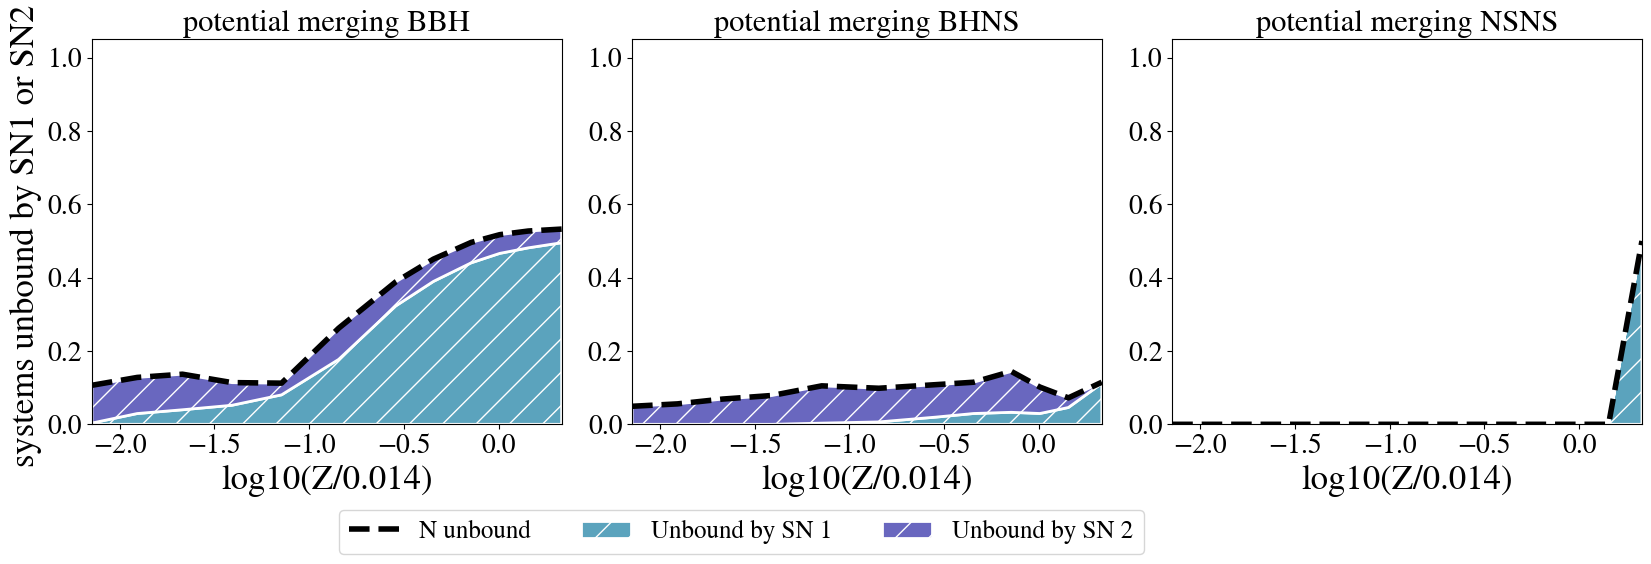

In [69]:
metallicities = np.unique(potential_DCO_progenitors['Metallicity@ZAMS(1)'])
print('metallicities', metallicities)   
Z_Zsun = np.log10(np.array(metallicities)/0.014)

first_or_second_mt = 'star2_firstMT_' #'firstMT_' # 'star2_firstMT_' # 


###########################################
# Create a figure
fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles = ["BBH", "BHNS", "NSNS"]
dfs = [potential_BBH_progenitors, potential_BHNS_progenitors, potential_NSNS_progenitors]

# Loop over the axes and dataframes
for ax, df, title in zip(axes, dfs, titles):
    ax.plot(1,1)
    N_tot_DCO_prog, N_unbound, N_unbound_by_SN1, N_unbound_by_SN2 =  get_unbound(table = df)
    print(N_tot_DCO_prog)

    
    # Normalize or abs numbers?
    norm = N_tot_DCO_prog #N_unbound # 1. # N_tot_DCO_prog

    ax.plot(Z_Zsun, N_unbound/norm, color='k', label='N unbound', ls = '--', lw = 4,alpha = 1)

    bottom = np.zeros(len(Z_Zsun))

    # Unbound by SN1
    ax.fill_between(Z_Zsun, bottom/norm, (bottom + N_unbound_by_SN1)/norm, color='#5ba3bd', edgecolor='white', hatch='/', lw = 2, label='Unbound by SN 1', alpha = 1)
    bottom += N_unbound_by_SN1

    # Unbound by SN2
    ax.fill_between(Z_Zsun, bottom/norm, (bottom + N_unbound_by_SN2)/norm, color='#6967bf', edgecolor='white', hatch='/', lw = 2, label='Unbound by SN 2', alpha = 1)
    bottom += N_unbound_by_SN2

    ax.set_title(f'potential merging {title}', fontsize = 22) #7x{N_tot_DCO_prog[0.0001]}
    ax.set_xlim(np.log10(1e-4/0.014),np.log10(0.03/0.014))
    ax.set_ylim(0,)
    ax.set_xlabel('log10(Z/0.014)', fontsize = 25)

#########################
# plotvalues
fig.subplots_adjust(wspace=0.15)

axes[0].set_ylabel("systems unbound by SN1 or SN2 ", fontsize = 25)

axes[0].legend(bbox_to_anchor=(0.5, -0.19), loc='upper left', fontsize = 18, ncols = 4)

# plt.savefig(f'../plots/{compas_v}/UnboundBySN12{sim_name}{channel_key}.pdf', bbox_inches='tight')
plt.show()



In [70]:
list(potential_BBH_progenitors.columns )

['SEED',
 'Metallicity@ZAMS(1)',
 'Stellar_Type(1)',
 'Stellar_Type(2)',
 'CE_Event_Counter',
 'Mass@ZAMS(1)',
 'Mass@ZAMS(2)',
 'SemiMajorAxis@ZAMS',
 'Merger',
 'Merger_At_Birth',
 'Unbound',
 'Immediate_RLOF>CE',
 'Optimistic_CE',
 'Applied_Kick_Magnitude(1)',
 'Applied_Kick_Magnitude(2)',
 'CH_on_MS(1)',
 'SN_Kick_Magnitude_Random_Number(1)',
 'SN_Kick_Phi(1)',
 'SN_Kick_Theta(1)',
 'SN_Kick_Mean_Anomaly(1)',
 'SN_Kick_Magnitude_Random_Number(2)',
 'SN_Kick_Phi(2)',
 'SN_Kick_Theta(2)',
 'SN_Kick_Mean_Anomaly(2)',
 'Merges_Hubble_Time',
 'SemiMajorAxis@DCO',
 'Coalescence_Time',
 'Eccentricity@DCO',
 'MT_Donor_Hist(1)',
 'MT_Donor_Hist(2)',
 'Mass(1)',
 'Mass(2)',
 'unique_Z_SEED',
 'firstMT_SemiMajorAxis<MT',
 'firstMT_SemiMajorAxis>MT',
 'firstMT_Radius(1)<MT',
 'firstMT_Radius(2)<MT',
 'firstMT_Radius(1)>MT',
 'firstMT_Radius(2)>MT',
 'firstMT_Mass(1)<MT',
 'firstMT_Mass(2)<MT',
 'firstMT_Mass(1)>MT',
 'firstMT_Mass(2)>MT',
 'firstMT_Stellar_Type(1)<MT',
 'firstMT_Stellar_Type(2

/tmp/ipykernel_27984/2127964370.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


0.0001
0.00017321
0.0003
0.00054772
0.001
0.002
0.004
0.00632456
0.01
0.01414214
0.02
0.03


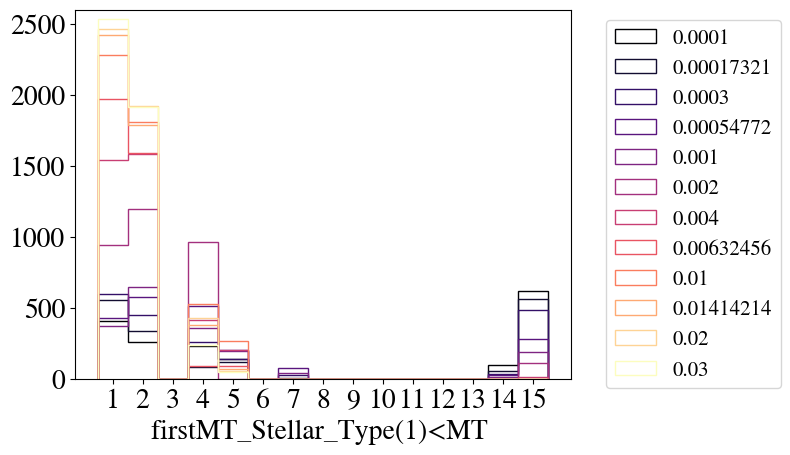

In [14]:
pot_BBH_grouped_byZ = potential_BBH_progenitors.groupby('Metallicity@ZAMS(1)')
# print(pot_BBH_grouped_byZ.groups.keys())

    plt.hist(group_table['SN_star2_Unbound'][group_table['Unbound'] == True],
     label = Z_group[0], bins = np.arange(0.5,16.5), color = colors[Z_i], histtype='step')


plt.xlabel('firstMT_Stellar_Type(1)<MT ')
plt.xticks(range(1,16))
plt.ylim(0,2600)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 15)
plt.show()




In [41]:
pot_BBH_grouped_byZ = potential_BBH_progenitors.groupby('Metallicity@ZAMS(1)')
# print(pot_BBH_grouped_byZ.groups.keys())

import seaborn as sns
import matplotlib.cm as cm
cmap = cm.get_cmap('magma')  
color_values = np.linspace(0, 1, len(pot_BBH_grouped_byZ.groups))
colors = cmap(color_values)


# print(pot_BBH_grouped_byZ.get_group(0.0001))
for Z_i, Z_group in enumerate(pot_BBH_grouped_byZ):
    print(Z_group[0])
    group_table = Z_group[1]

    plt.hist(group_table['firstMT_Stellar_Type(1)<MT'][group_table['Unbound'] == True],
     label = Z_group[0], bins = np.arange(0.5,16.5), color = colors[Z_i], histtype='step')


plt.xlabel('firstMT_Stellar_Type(1)<MT ')
plt.xticks(range(1,16))
plt.ylim(0,2600)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 15)
plt.show()




array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [38]:
unbound_pot_BBH_grouped_byZ = unbound_pot_BBH.groupby('Metallicity@ZAMS(1)')



# print(pot_BBH_grouped_byZ.get_group(0.0001))
for Z_group in unbound_pot_BBH_grouped_byZ:
    print(Z_group[0])
    group_table = Z_group[1]

['firstMT_Stellar_Type(1)<MT']


In [ ]:
unbound_pot_BBH_grouped_byZ